grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 at 30x30 arc seconds reduced by Gaussian Cartesian filtering (2.6 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 15x15 degree grid tile (earth_relief_30s_g): S45W090
/tmp/ipykernel_60765/4262443145.py:61: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(grid=depth_grid,region=region,interval=20,annotation='40+e+f10p+gwhite')


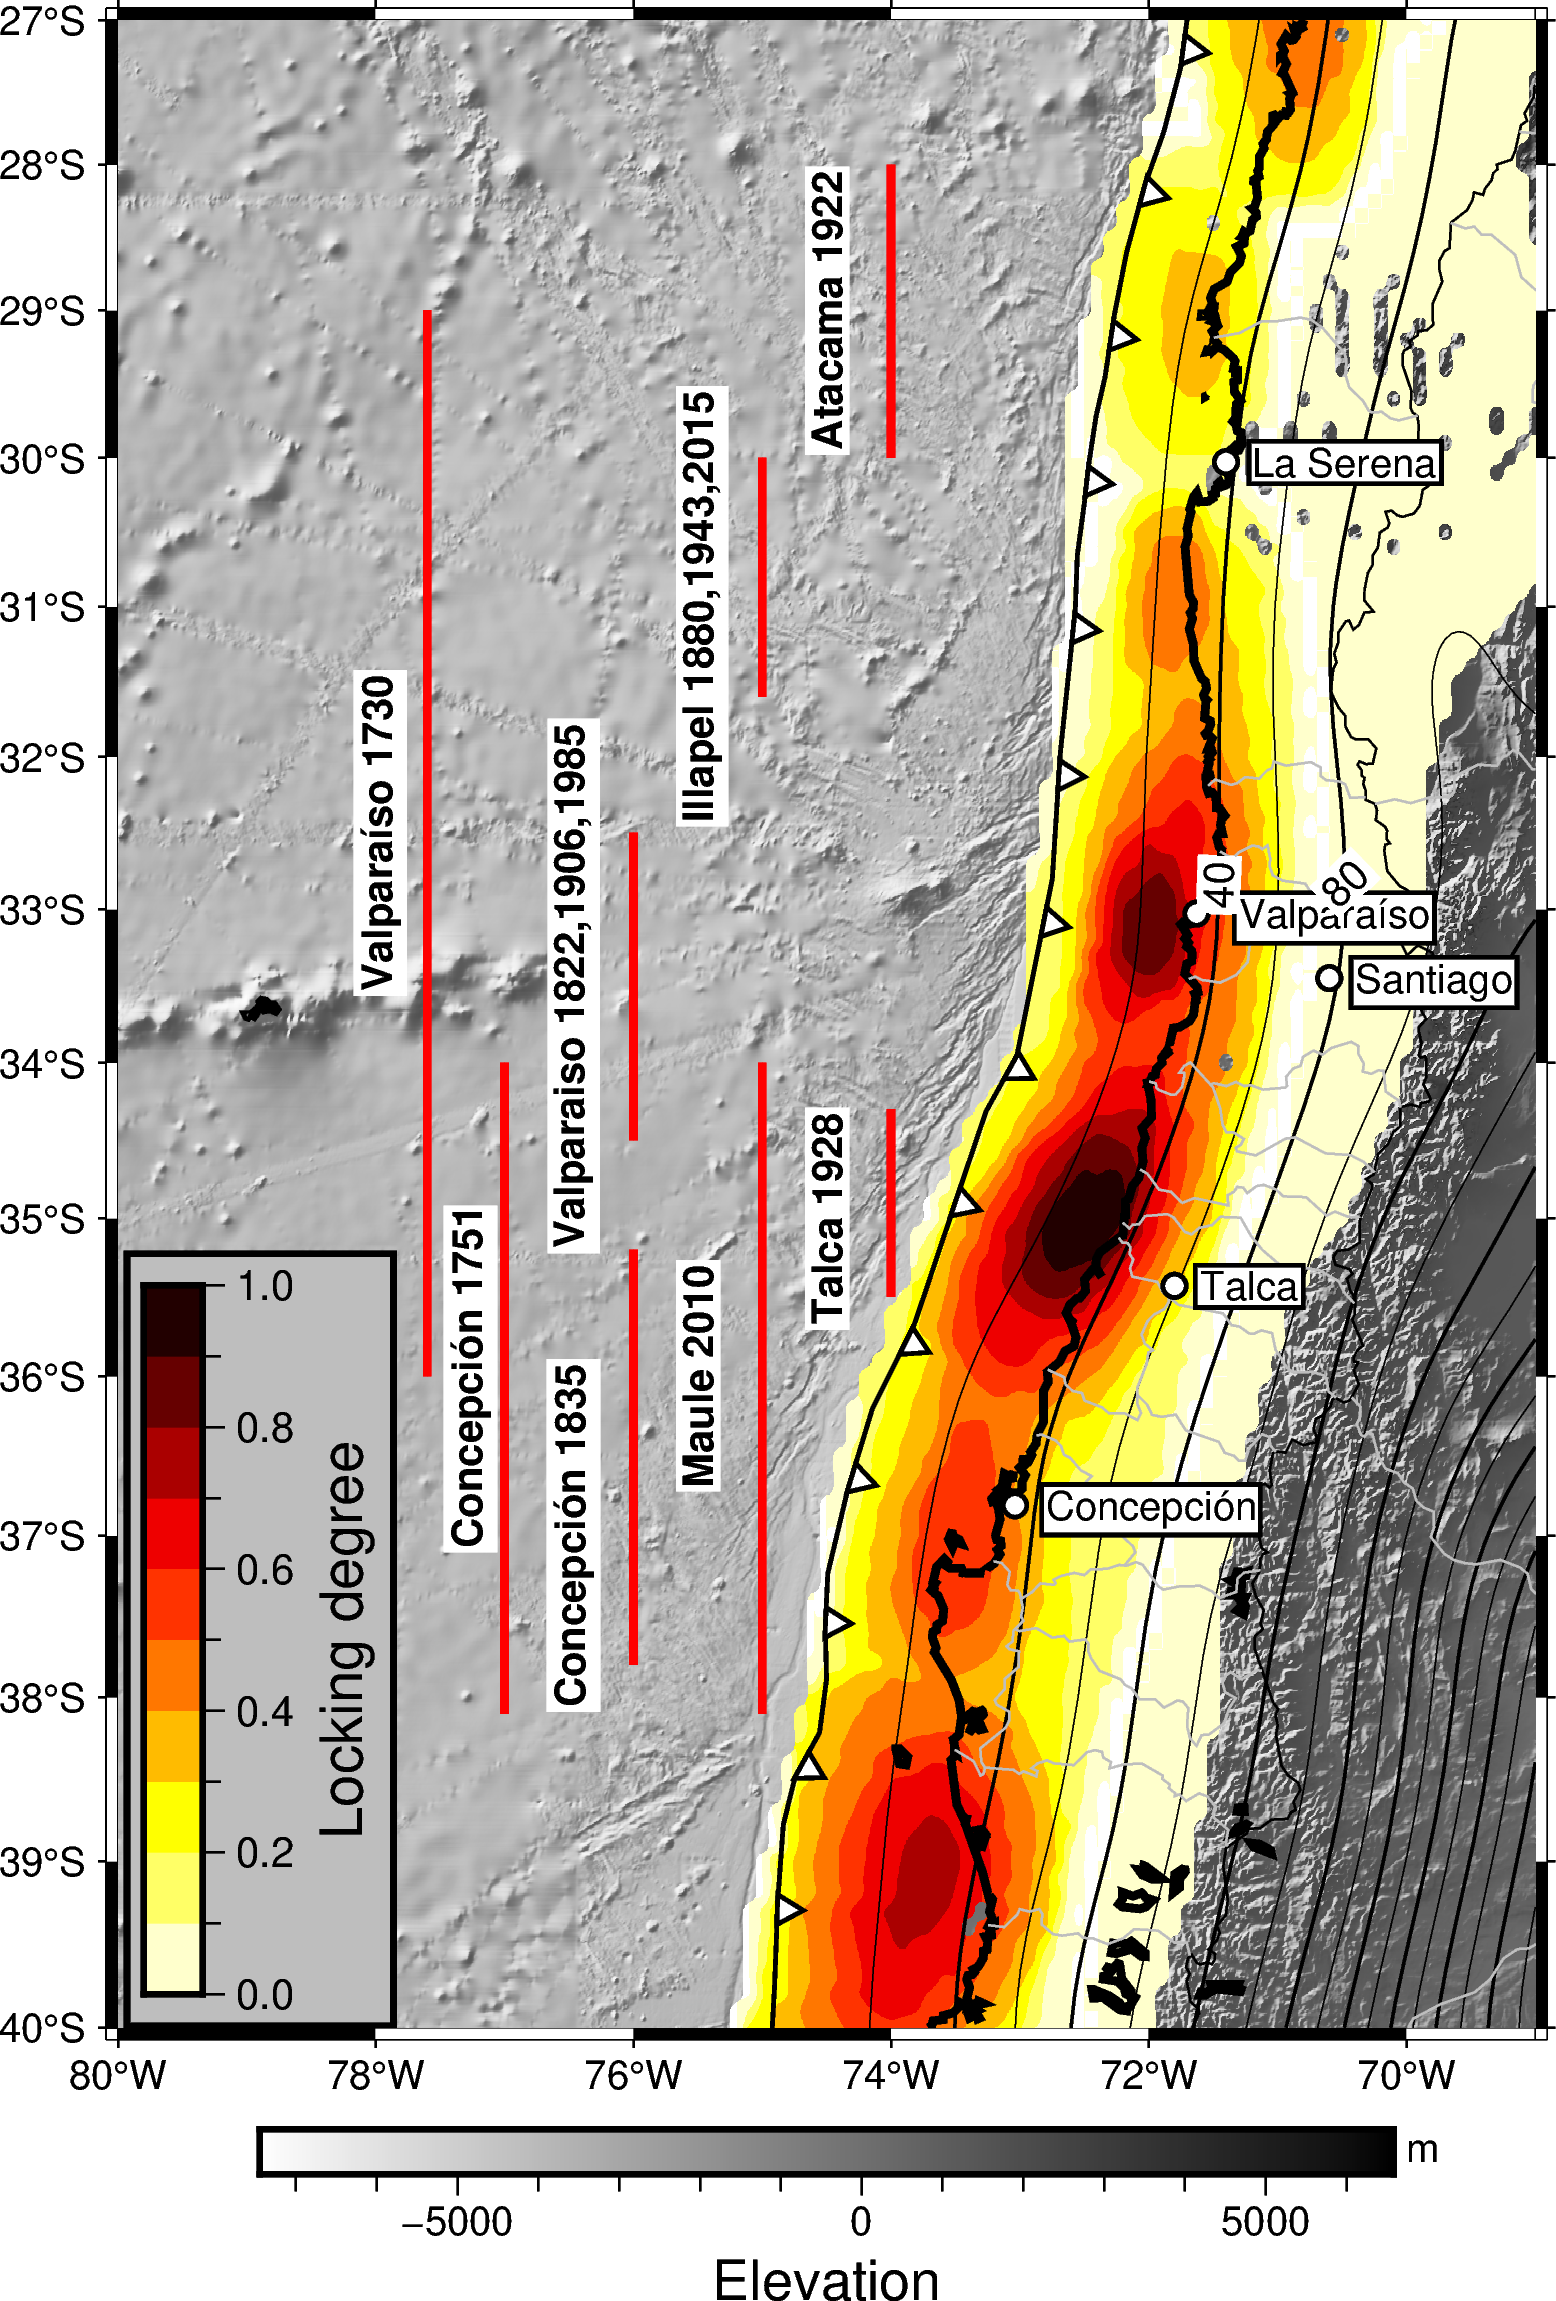

In [1]:
import pygmt
import numpy as np
import geostochpy
import rockhound as rh
file_trench=geostochpy.get_data('trench-chile.txt')
trench = np.genfromtxt( file_trench, delimiter = " " )
lonfosa = trench[:,0]
latfosa = trench[:,1]
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
route_file=geostochpy.get_data('median_lock_Herrera2023.txt')
route_file_mesh=geostochpy.get_data('mesh__Herrera2023.npy')
mesh=np.load(route_file_mesh,allow_pickle=True)
median_lock=np.loadtxt(route_file)
mesh1=mesh[0]
mesh1[0,0]-mesh1[1,0]
#
grid=pygmt.xyz2grd(x=mesh1[:,0],y=mesh1[:,1],z=median_lock,region=region,spacing='0.1')
grid=pygmt.grdsample(grid=grid,region=region,spacing='0.005')
region=[-80,-69,-40,-27]
region2=[-76,-68,-36,-28]
earth_grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
#
fig=pygmt.Figure()
fig.basemap(region=region,projection='M12c',frame=['WSne','y1+laatitude(°)','x2+laongitude(°)','g'])
fig.grdimage(grid=earth_grid,cmap='grayC',shading=True)
fig.colorbar(cmap=True,frame=["x+lElevation","y+lm"],)
cmap=pygmt.makecpt(cmap='hot',reverse=True,series=[0, 1, 0.1],continuous=False)
# fig.coast(shorelines=True, area_thresh=5000,land="gray")
# valparaiso 1730
fig.plot(x=[-77.6,-77.6],y=[-29,-36],fill='red',pen='2,red')
fig.text(x=-78,y=-32.5,text='Valparaíso 1730',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# valparaiso 1751
fig.plot(x=[-77,-77],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-77.3,y=-36,text='Concepción 1751',fill='white',font="10p,Helvetica-Bold,black",angle=90)

# valparaiso 1985,1906,1822
fig.plot(x=[-76,-76],y=[-32.5,-34.5],fill='red',pen='2,red')
fig.text(x=-76.5,y=-33.5,text='Valparaiso 1822,1906,1985',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Illapel 2015,1943,1880
fig.plot(x=[-75,-75],y=[-30,-31.6],fill='red',pen='2,red')
fig.text(x=-75.5,y=-31,text='Illapel 1880,1943,2015',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Talca 1928
fig.plot(x=[-74,-74],y=[-34.3,-35.5],fill='red',pen='2,red')
fig.text(x=-74.5,y=-35,text='Talca 1928',fill='white',font="10p,Helvetica-Bold,black",angle=90)
#Atacama 1922
fig.plot(x=[-74,-74],y=[-28,-30],fill='red',pen='2,red')
fig.text(x=-74.5,y=-29,text='Atacama 1922',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Maule 2010
fig.plot(x=[-75,-75],y=[-34,-38.1],fill='red',pen='2,red')
fig.text(x=-75.5,y=-36,text='Maule 2010',fill='white',font="10p,Helvetica-Bold,black",angle=90)
# Concepcion 1835
fig.plot(x=[-76,-76],y=[-35.2,-37.8],fill='red',pen='2,red')
fig.text(x=-76.5,y=-37,text='Concepción 1835',fill='white',font="10p,Helvetica-Bold,black",angle=90)

##
fig.grdimage(grid=grid,cmap=cmap,nan_transparent=True)
# fig.grdimage(grid=file2,cmap=cmap,nan_transparent=True)
#
depth_grid=rh.fetch_slab2('south_america').depth/-1000
fig.grdcontour(grid=depth_grid,region=region,interval=20,annotation='40+e+f10p+gwhite')
fig.coast(shorelines="2p,black",borders=["1/0.5p,black", "2/0.5p,gray", "3/0.5p,blue"])

fig.plot(x=lonfosa,y=latfosa,
        projection='M12c',
        region=region,
        pen="1p",
        fill="white",
        style="f0.5i/0.1i+r+t+o1")
fig.colorbar(
    cmap=cmap,
    # Colorbar positioned at map coordinates (g) longitude/latitude 0.3/8.7,
    # with a length/width (+w) of 4 cm by 0.5 cm, and plotted horizontally (+h)
    position="g-79.8/-39.8+w6c/0.5c+v",
    box='+ggray+pblack',
    frame=["x+lLocking degree"],
)
fig.show()
fig.savefig('Coupling.png')

In [14]:
import numpy as np
from scipy.interpolate import griddata
import geostochpy
import numpy as np
import matplotlib.pyplot as plt
import pygmt
nx=8
ny=60
width=190
length=1200
dx_meters=width/nx*1000
dy_meters=length/ny*1000
# Create a grid of points
route_file=geostochpy.get_data('median_lock_Herrera2023.txt')
route_file_mesh=geostochpy.get_data('mesh__Herrera2023.npy')
mesh=np.load(route_file_mesh,allow_pickle=True)
median_lock=np.loadtxt(route_file)
mesh1=mesh[0]
x=mesh1[:,0]
y=mesh1[:,1]
z=median_lock
route_trench = geostochpy.get_data('trench-chile.txt')
lonsfosa, latsfosa,strikefosa  = geostochpy.load_trench(route_trench)
slabdep,slabdip,slabstrike,slabrake=geostochpy.load_files_slab2(zone='south_america',rake=True)
north=-27
lon,lat,lon_flat,lat_flat=geostochpy.make_fault_alongstriketrench(lonsfosa, latsfosa,strikefosa,north, nx, ny, width, length)
X_grid,Y_grid,dep,dip,strike,rake=geostochpy.interp_slabtofault(lon_flat,lat_flat,nx,ny,slabdep,slabdip,slabstrike,slabrake)
taper_coupling = griddata((x, y), z, (X_grid, Y_grid), method='linear', fill_value=0, rescale=True)
# geostochpy.plot_slip(X_grid,Y_grid,lonfosa,latfosa,taper_coupling,'coupling_ia.png',show=False,cmap='rainbow')


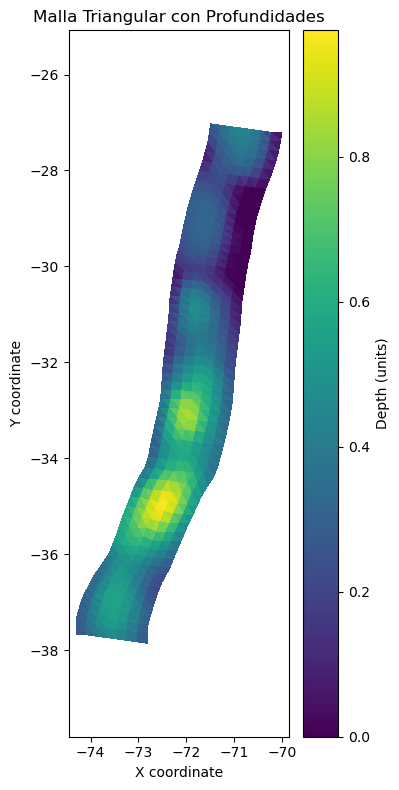

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Supongamos que tienes las coordenadas X, Y y Z
# Aquí tienes algunos datos de ejemplo
x = X_grid.flatten()
y = Y_grid.flatten()
z = taper_coupling.flatten()

# Crear la malla rectangular
# Asumimos que los puntos están ordenados correctamente en una grilla regular
n_cols = nx  # Número de columnas en la malla
n_rows = ny  # Número de filas en la malla


triangles = []
for i in range(n_rows - 1):
    for j in range(n_cols- 1):
        # Índices de los cuatro vértices del rectángulo
        lower_left = i * n_cols + j
        lower_right = lower_left + 1
        upper_left = lower_left + n_cols
        upper_right = upper_left + 1
        
        # Crear dos triángulos a partir del rectángulo
        triangles.append([lower_left, lower_right, upper_right])
        triangles.append([lower_left, upper_right, upper_left])

# Convertir la lista de triángulos en un array numpy
triangles = np.array(triangles)

# Crear un objeto Triangulation
triang = tri.Triangulation(x, y, triangles)

# Graficar la malla triangular usando tripcolor y triplot
plt.figure(figsize=(7, 8))

# Subplot 1: Tripcolor y triplot
plt.subplot(1, 2, 1)
tripc = plt.tripcolor(triang, z, cmap='viridis', linewidth=0.015)
plt.triplot(triang, linewidth=0.01)
cbar = plt.colorbar(tripc)
cbar.set_label("Depth (units)")
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
plt.axis("equal")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Malla Triangular con Profundidades")

plt.tight_layout()
plt.show()
